In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
df = pd.read_csv('./iris.csv')
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
cate = []

def category2label(x):
    if x not in cate:
        cate.append(x)
    return cate.index(x)


df["label"] = df['class'].apply(category2label)
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [4]:
X = df[df.columns[:4]]
Y = df[df.columns[-1]]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [5]:
clf = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,10), random_state=42)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)

1.0

In [6]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


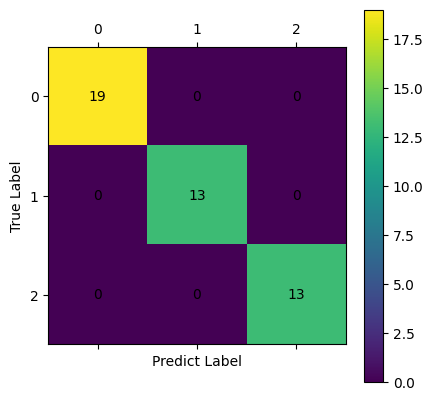

In [7]:
y_pred = clf.predict(x_test)
y_real = y_test
cf_mx = confusion_matrix(y_real,y_pred)
print(cf_mx)
plt.matshow(cf_mx)

for x in range(len(cf_mx)):
    for y in range(len(cf_mx)):
        info = cf_mx[y,x]
        plt.text(x,y,info,verticalalignment='center',horizontalalignment='center')

plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.colorbar()
plt.show()